# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Kamil Kluz 253022

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 4

1. Wczytanie sygnałów i ich interpretacja, odczytanie częstotliwości sygnałów sinusoidalnych.
2. Transformata Fouriera jako narzędzie do analizy częstotliwościowej.
3. Decymacja i aliasing - czym jest i jak ją interpretować.
4. Przeciek widma - kiedy występuje?
5. Spektrogram jako narzędzie do analizy czasowo-częstotliwościowej.

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [8]:
% pkg install -forge signal
pkg load signal

### Zadanie 1

Na pierwszych i drugich zajęciach nauczyliśmy się ustalać częstotliwość sygnału sinusoidalnego na podstawie przebiegu czasowego. Spróbujmy zrobić to ponownie - w plikach sig_1.mat oraz sig_2.mat znajdują się zapisane sygnały. Wyrysuj ich przebieg w czasie i postaraj się odczytać częstotliwość sygnałów sinusoidalnych. Częstotliwość próbkowania wynosi $f_s=2 [kHz]$.
Czy udało Ci się w obu przypadkach rozszyfrować z jakich sygnałów sinusoidalnych składa się sygnał? Odpowiedź zapisz w komórce poniżej kodu.



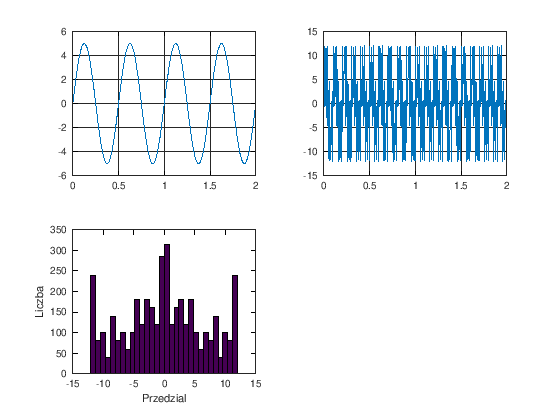

In [8]:
% tutaj jest mijesce na napisanie kodu


load('sig_1.mat')
load('sig_2.mat')

fs = 2000;
delta_t = 1/fs;
len_sig_1 = length(sig_1);
t = 0:delta_t:(len_sig_1 - 1)*delta_t;

figure

subplot(2,2,1);
plot(t, sig_1);
grid on

subplot (2,2,2);
plot(t, sig_2)
grid on


subplot(2,2,3)
hist(sig_2, 30)
xlabel('Przedzial')
ylabel('Liczba')


**ODPOWIEDŹ:**


TUAJ NAPISZ ODPOWIEDZ
f1=2Hz



## Transformata Fouriera

Cyfrowe sygnały mogą być analizowane w dziedzinie czasu oraz w dziedzinie częstotliwości. Algorytmy działające w dziedzinie czasu operują bezpośrednio na próbkach cyfrowego sygnału. Analiza częstotliwościowa sygnału, stosowana w wielu operacjach cyfrowego przetwarzania sygnałów, polega na przekształceniu sygnału z dziedziny czasu do dziedziny częstotliwości. Widmo sygnału (ang. spectrum) to reprezentacja częstotliwościowa sygnału, często mówi się więc o analizie widmowej.

Jean-Baptiste Joseph Fourier odkrył, że dowolny sygnał okresowy można przedstawić w postaci szeregu Fouriera, czyli sumy sygnałów trygonometrycznych (kosinusów i sinusów) o różnych amplitudach i częstotliwościach. Operację przekształcenia sygnału z dziedziny czasu do dziedziny częstotliwości nazywa się przekształceniem (transformacją) Fouriera (Fourier transform). Wynik tej operacji, czyli częstotliwościową reprezentację sygnału, nazywa się transformatą Fouriera. W przypadku sygnałów dyskretnych (cyfrowych) mówimy o dyskretnym przekształceniu Fouriera (DFT - Discrete Fourier Transform). W praktyce zwykle nie oblicza się transformaty z definicji, stosuje się np. algorytm szybkiego przekształcenia Fouriera (FFT - Fast Fourier Transform).

Na podstawie N próbek sygnału otrzymujemy N wartości widmowych, pokrywających zakres od 0 do  fs , gdzie  fs  jest częstotliwością próbkowania, a  fs/2  jest częstotliwością Nyquista.


W naszym przypadku korzystać będziemy z funkcji **fft( )** do obliczenia transformaty oraz funkcji **stem( )** do jej wyrysowania.

### Zadanie 2

Oblicz transformatę Fouriera dla wczytanych wcześniej sygnałów oraz wyrysuj jej widmo amplitudowe.

Chcemy uzyskać dwa podwójne wykresy - na każdym z nich będziemy mieć sygnał w czasie, a pod nim wyrysowane widmo. Czy jesteśmy w stanie odczytać z jakich składowych sinusoidalnych składa się nasz sygnał?





In [5]:
% help fft
% help abs
% helpo stem

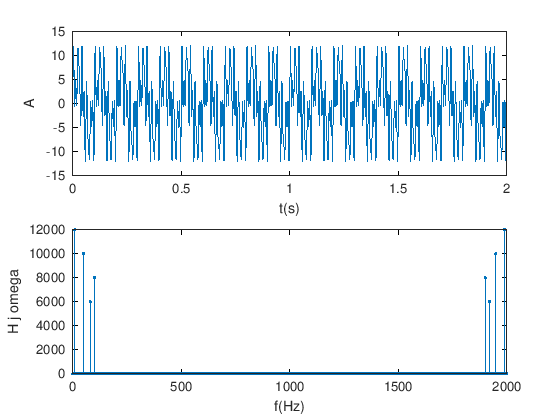

In [2]:
% tutaj jest miejsce na napisanie kodu
load("sig_2.mat")
fs = 2000;
delta_t = 1/fs;
len_sig_2 = length(sig_2);
t = 0:delta_t:(len_sig_2 - 1)*delta_t;

tf_sig = fft(sig_2);
abs_tf_sig = abs(tf_sig);

N_tf = length(tf_sig);
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;

figure
subplot(2,1,1)
plot(t, sig_2)
xlabel('t(s)')
ylabel('A')

subplot(2,1,2)
stem(f, abs_tf_sig, '.')
xlabel("f(Hz)")
ylabel("H j omega")


### Zadanie 3

Analiza częstotliwościowa szumu - sprawdźmy z jakich składowych sinusoidalnych składają się poszczególne szumy. W tym celu:
1. Za pomocą funkcji **`load`** wczytujemy dwa pliki z szumem do naszego programu. Nazwy zmiennych są tożsame z nazwami pliku (czyli po wykonaniu load mamy w programie dostępne zmienne `szum_1` oraz `szum_2`).
2. Generujemy wektor czasu dla naszego sygnału. Częstotliwość próbkowania wynosi $f_s=500[Hz]$, natomiast długość sygnału w próbkach (czyli długość wektora) można sprawdzić za pomocą funkcji **`length()`**. Dla ułatwienia szumy zostały zapisane z taką samą częstotliwością próbkowania i mają tyle samo próbek, więc wystarczy nam jeden wektor czasu.
2. Rysujemy pierwszy potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_1 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał 20 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
3. Rysujemy drugi potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_2 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał tym razem 10 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
4. Uruchamiamy komórkę i poprawiamy tytuły wykresów  (`title()`) na takie, które będą związane z rodzajem wyrysowanego szumu.


In [3]:
% dokumentacja do wykorzystywanych funkcji. Aby ją zobaczyć należy odkomentować linijkę która aktualnie Was interesuje
% help load
% help hist
% help fft
% help stem

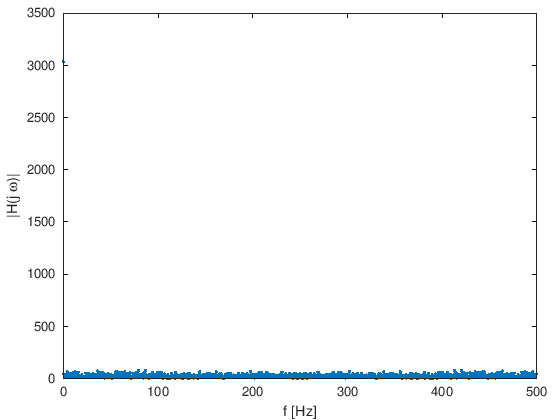

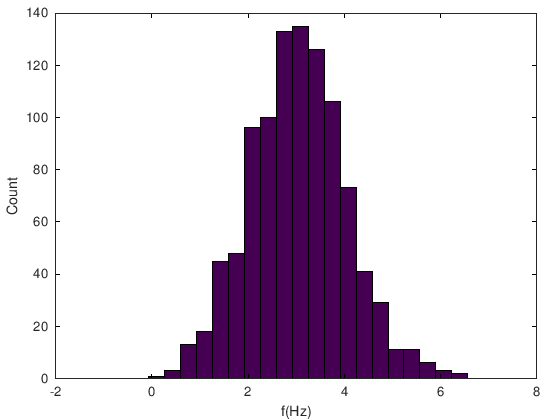

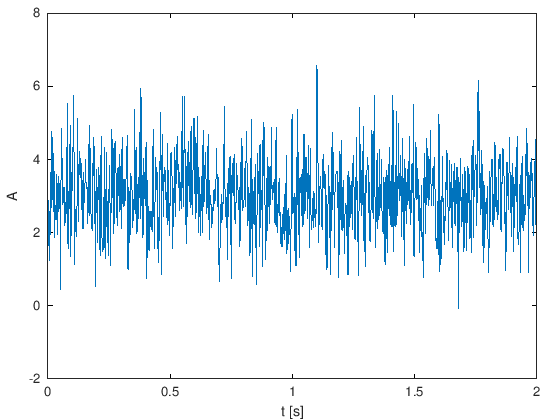

In [10]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_1


load("szum_1_L4.mat");
fs = 500;
delta = 1/fs;
ts = 0:delta:length(szum_1)*delta - delta;

figure

plot(ts, szum_1)
xlabel("t [s]")
ylabel("A")


figure

hist(szum_1,20)
xlabel("f(Hz)")
ylabel("Count")


figure
tf_sig_szum_1 = fft(szum_1);
abs_tf_szum_1 = abs(tf_sig_szum_1);
N_tf = length(abs_tf_szum_1);
f_step = f_s/N_tf;
f = 0:f_step:f_s-f_step;

stem(f,abs_tf_szum_1,'.')
xlabel("f [Hz]")
ylabel("|H(j \\omega)|")


















In [0]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_2








figure
% rysunki dla szum_2








### Zadanie 5

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy poprzednim temacie. Pamiętaj o opisaniu wykresu! Skorzystaj z pierwszego pola w funkcji _subplot()_ - będziemy chcieli mieć dwa wykresy pod sobą (dwa wiersze, jedna kolumna).

Na drugim wykresie wyrysuj widmo amplitudowe tego sygnału. Co na jego podstawie możesz powiedzieć? Co jesteś w stanie powiedzieć na temat częstotliwości maksymalnej sygnału w stosunku do częstotliwości próbkowania?



dlt =  37448


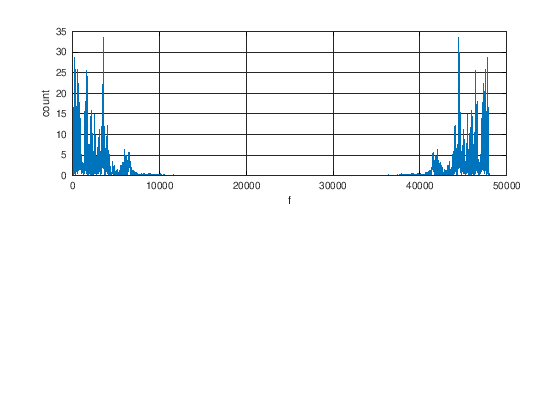

In [1]:
% tuaj jest miejsce na kod
[sig, fs]=audioread ("czepek_L4.wav");
len=length(sig);
dt=len/fs;
trans=fft(sig);
abs3=abs(trans);
length(trans);
length(abs3);
dlt=length(abs3)
f=0:fs/dlt:fs-(fs/dlt);
figure
subplot(2,1,1)
plot(f,abs3)
xlabel('f')
ylabel('count')
grid on


**ODPOWIEDŹ**: 

TUTAJ ZAPISZ ODPOWIEDŹ

## Decymacja

Czym jest decymacja? Na podstawie tego co usłyszałeś zapisz definicję zrozumiałą dla Ciebie :)

**Decymacja** - Tak jak w imperium rzymskim było to uśmiercenie co któregoś żołnierza, tak samo tutaj jest to uśmiercenie co którejś próbki


### Zadanie 6

Przeanalizuj wczytane dzisiaj sygnały (sig_1, sig_2 oraz czepek) - czy możemy wykonać ich decymację? Jeśli tak to jakiego rzędu? Przeprowadź decymację sygnałów w których jest to możliwe. Za każdym razem wyrysuj przebieg czasowy i widmo amplitudowe przed decymacją oraz po niej. Czy coś się zmieniło na widmie? Przeanalizuj i opisz co dokładnie widzisz. Opisz wnioski ze swojego eksperymentu w polu odpowiedź.

Do wykonania decymacji użyj funkcji **decimate()**.

In [4]:
% tutaj jest miejesce na napisanie kodu







**Odpowiedź:**




___